In [1]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

df = pd.read_csv('data/locations.csv')
df.tail()

,Name_Orig,Lat_Orig,Lng_Orig,Name_Des,Lat_Des,Lng_Des,Distance (nm),Distance (mi),Distance (km)
17,"Wellfleet, MA",41.931,-70.031,"Boston, MA",42.360,-71.059,52.6,60.6,97.4
18,"Columbus, OH",39.961,-82.999,"South Bend, IN",41.676,-86.252,180.4,207.6,334.0
19,"Columbus, OH",39.961,-82.999,"Dublin, Ireland",53.350,-6.260,3110.3,3579.3,5760.3
20,"Columbus, OH",39.961,-82.999,"Fort Worth, TX",32.755,-97.331,816.3,939.3,1511.7
21,"Columbus, OH",39.961,-82.999,"Norwalk, CT",41.118,-73.408,443.9,510.9,822.1


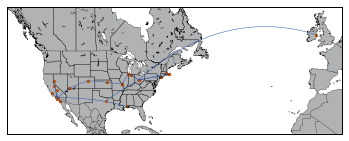

In [2]:
# Basemap parameter options here: http://matplotlib.org/basemap/api/basemap_api.html

lat_0 = 0
lon_0 = 0
llcrnrlat = 20
llcrnrlon = -140
urcrnrlat = 60
urcrnrlon = 5

fig=plt.figure()
m = Basemap(projection='merc', 
            lat_0=lat_0, lon_0=lon_0, lat_ts=20, area_thresh=500,
            llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
            resolution='l')

m.drawmapboundary(fill_color='#FFFFFF')
m.fillcontinents(color='#B1B2B4',lake_color='#FFFFFF',zorder=0)

m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.25)
m.drawstates(linewidth=0.25)

lat_orig = 35.639255
lng_orig = -120.713308
lat_des  = 39.961
lng_des  = -82.999

for row in range(0,df.shape[0]): 
    lat_orig = df.iloc[row,1]
    lng_orig = df.iloc[row,2]
    lat_des  = df.iloc[row,4]
    lng_des  = df.iloc[row,5]
    m.drawgreatcircle(lon1=lng_orig, lat1=lat_orig, lon2=lng_des, lat2=lat_des,
                      linewidth=.5,color='#2E5FAC')
    x, y = m(lng_orig,lat_orig)
    m.scatter(x,y,5,marker='o',edgecolors='#CF5300',c='#CF5300')
    x, y = m(lng_des,lat_des)
    m.scatter(x,y,5,marker='o',edgecolors='#CF5300',c='#CF5300')

plt.show()
fig.savefig('2016 Travel.png', dpi=800)